In [19]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height (1).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

In [22]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Feature Processing**

***Categorical Features***

In [23]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
pd.get_dummies(data['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


**Feature Transformation**

****1) Rescale with fixed factor****

In [0]:
data['Height (feet)'] = data['Height'] / 12.0
data['Weight (100 lbs)'] = data['Weight'] / 100.0

In [26]:
data.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


**MinMax normalization**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()
data['Weight_mms'] = mms.fit_transform(data[['Weight']])
data['Height_mms'] = mms.fit_transform(data[['Height']])
data.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


***3) Standard Normalization***

In [30]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
data['Weight_ss'] = mms.fit_transform(data[['Weight']])
data['Height_ss'] = mms.fit_transform(data[['Height']])
data.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


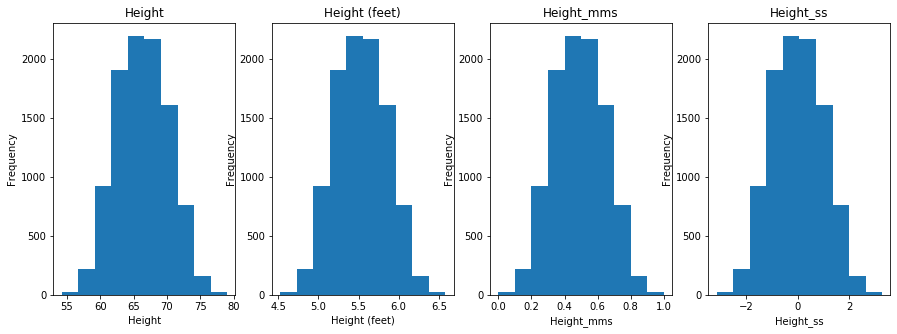

In [32]:
plt.figure(figsize=(15,5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
  plt.subplot(1, 4, i+1)
  data[feature].plot(kind = 'hist', title = feature)
  plt.xlabel(feature)